In [5]:
import requests, re, nltk
from bs4 import BeautifulSoup
from nltk import clean_html
from collections import Counter
import operator

# we may not care about the usage of stop words
stop_words = nltk.corpus.stopwords.words('english') + [
 'ut', '\'re','.', ',', '--', '\'s', '?', ')', ':', '(', '\'',
 '\"', '-', '}', '{', '&', '|', u'\u2014', '', '–', 'still', 'good', 'well',
'said', 'â\x80\x9ci', 'gutenberg-tm', 'mr', 'project', 'one', 'uh', 'don’t',
 'would', 'made']


# We most likely would like to remove html markup
def cleanHtml (html):
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')
    return soup .get_text()

# We also want to remove special characters, quotes, etc. from each word
def cleanWord (w):
    # r in r'[.,"\']' tells to treat \ as a regular character 
    # but we need to escape ' with \'
    # any character between the brackets [] is to be removed 
    wn = re.sub('[,"\.\'&\|@>*;/=]', "", w)
    # get rid of numbers
    return re.sub('^[0-9\.]*$', "", wn)
       
# define a function to get text/clean/calculate frequency
def debate_word_dictionary_generator (URL, name1, name2, modList, allWords):
    # first get the web page
    r = requests .get(URL)
    
    # Now clean
    # remove html markup
    t = cleanHtml (r .text) .lower()
    
    # split string into an array of words using any sequence of spaces "\s+" 
    wds = re .split('\s+',t)
    
    
    
    # remove periods, commas, etc stuck to the edges of words
    for i in range(len(wds)):
        wds[i] = cleanWord (wds [i])
        
    name1Arr = []
    name2Arr = []
    switcher = 3
            
    for i in range(len(wds)):
        if wds[i] == name1:
            switcher = 1
            
        elif wds[i] == name2:
            switcher = 2
            
        elif wds[i] in modList:
            switcher = 3
            
        else:
            if switcher == 1:
                name1Arr.append(wds[i])
                
            elif switcher == 2:
                name2Arr.append(wds[i])
    
    # If satisfied with results, lets go to the next step: calculate frequencies
    # We can write a loop to create a dictionary, but 
    # there is a special function for everything in python
    # in particular for counting frequencies (like function table() in R)
    wf1 = Counter (name1Arr)
    wf2 = Counter (name2Arr)
    
    # Remove stop words from the dictionary wf
    for k in stop_words:
        wf1. pop(k, None)
        wf2. pop(k, None)
           
        
    #how many regular words in the document?
    tw1 = 0
    for w in wf1:
       tw1 += wf1[w]
        
    tw2 = 0
    for w in wf2:
       tw2 += wf2[w] 
    # Get ordered list
    wfs1 = sorted (wf1 .items(), key = operator.itemgetter(1), reverse=True)
    ml1 = min(len(wfs1),30)
    
    wfs2 = sorted (wf2 .items(), key = operator.itemgetter(1), reverse=True)
    ml2 = min(len(wfs2),30)
    

    if not allWords:
        #Reverse the list because barh plots items from the bottom
        return [(wfs1 [ 0:ml1 ] [::-1], tw1), (wfs2 [ 0:ml2 ] [::-1], tw2)]
    else:
        #Reverse the list because barh plots items from the bottom
        return [(wfs1  [::-1], tw1), (wfs2  [::-1], tw2)]
        
# Now populate two lists    
debateArr = debate_word_dictionary_generator ('https://www.debates.org/voter-education/debate-transcripts/october-7-1984-debate-transcript/', "president:", "mondale:", ['wieghart:', 'walters:', 'sawyer:', 'barnes:'], False)
debateArr2 = debate_word_dictionary_generator ('https://www.debates.org/voter-education/debate-transcripts/october-21-1984-debate-transcript/', "president:", "mondale:", ['ridings:', 'newman:', 'geyer:', 'kalb:', 'kondracke:', 'audience member:', 'trewhitt:'], False)
# Now populate two lists    
fullDebateArr = debate_word_dictionary_generator ('https://www.debates.org/voter-education/debate-transcripts/october-7-1984-debate-transcript/', "president:", "mondale:", ['wieghart:', 'walters:', 'sawyer:', 'barnes:'], True)
fullDebateArr2 = debate_word_dictionary_generator ('https://www.debates.org/voter-education/debate-transcripts/october-21-1984-debate-transcript/', "president:", "mondale:", ['ridings:', 'newman:', 'geyer:', 'kalb:', 'kondracke:', 'audience member:', 'trewhitt:'], True)


total_debate_arr_1 = {}
total_debate_arr_2 = {}

#small total array
for key, value in debateArr[0][0]:
    total_debate_arr_1[key] = value

for key, value in debateArr2[0][0]:
    if key in total_debate_arr_1:
        total_debate_arr_1[key] += value
    else:
        total_debate_arr_1[key] = value

        
for key, value in debateArr[1][0]:
    total_debate_arr_2[key] = value

for key, value in debateArr2[1][0]:
    if key in total_debate_arr_2:
        total_debate_arr_2[key] += value
    else:
        total_debate_arr_2[key] = value

        
        
total_arr1 = sorted (total_debate_arr_1 .items(), key = operator.itemgetter(1), reverse=True)
total_ml1 = min(len(total_arr1),30)

total_arr2 = sorted (total_debate_arr_2 .items(), key = operator.itemgetter(1), reverse=True)
total_ml2 = min(len(total_arr2),30)

full_total_debate_arr_1 = {}
full_total_debate_arr_2 = {}

#large total array
for key, value in fullDebateArr[0][0]:
    full_total_debate_arr_1[key] = value

for key, value in fullDebateArr2[0][0]:
    if key in full_total_debate_arr_1:
        full_total_debate_arr_1[key] += value
    else:
        full_total_debate_arr_1[key] = value

        
        
for key, value in fullDebateArr[1][0]:
    full_total_debate_arr_2[key] = value

for key, value in fullDebateArr2[1][0]:
    if key in full_total_debate_arr_2:
        full_total_debate_arr_2[key] += value
    else:
        full_total_debate_arr_2[key] = value

        
        
full_total_arr1 = sorted (total_debate_arr_1 .items(), key = operator.itemgetter(1), reverse=True)

full_total_arr2 = sorted (total_debate_arr_2 .items(), key = operator.itemgetter(1), reverse=True)


print(total_arr1)
print(total_arr2)

[('think', 59), ('people', 54), ('going', 53), ('know', 37), ('say', 35), ('us', 34), ('could', 34), ('government', 33), ('time', 31), ('we’re', 29), ('years', 29), ('things', 28), ('yes', 27), ('regard', 24), ('ms', 24), ('i’m', 23), ('tax', 23), ('also', 21), ('security', 19), ('social', 19), ('go', 17), ('believe', 16), ('missiles', 16), ('percent', 15), ('weapons', 15), ('nuclear', 15), ('world', 15), ('life', 13), ('mondale', 13), ('increase', 12), ('taxes', 12), ('soviet', 12), ('country', 11), ('want', 11), ('union', 11), ('back', 11), ('child', 10), ('taking', 10), ('never', 10), ('thought', 10), ('something', 10), ('many', 10), ('get', 9), ('take', 9)]
[('president', 100), ('people', 62), ('think', 58), ('that’s', 57), ('must', 48), ('american', 47), ('want', 42), ('us', 41), ('know', 39), ('get', 32), ('time', 29), ('it’s', 29), ('arms', 28), ('country', 24), ('every', 23), ('way', 22), ('soviet', 22), ('ms', 20), ('going', 20), ('control', 19), ('administration', 19), ('nati

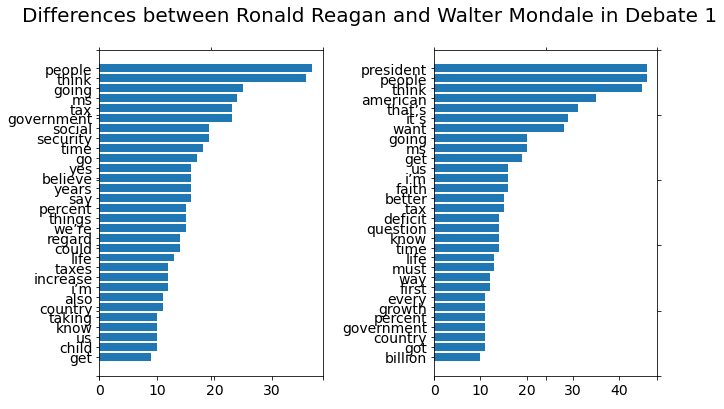

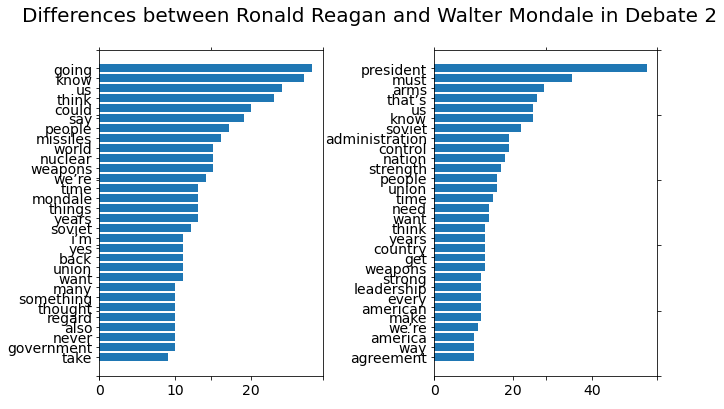

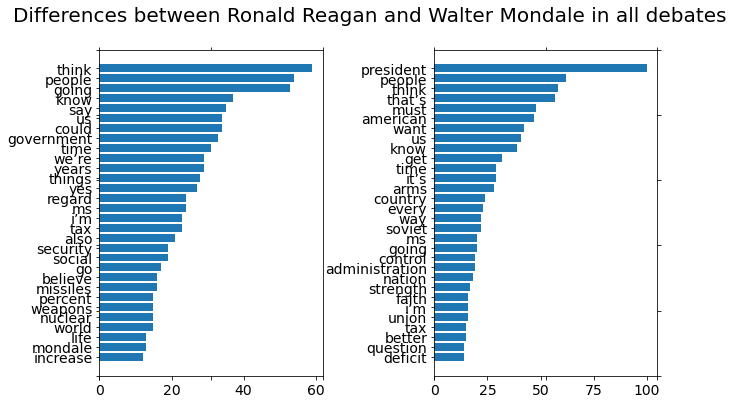

In [6]:
import numpy as np
import pylab
import matplotlib.pyplot as plt

%matplotlib inline
def plotTwoLists (wf_ee, wf_bu, title):
    f = plt.figure (figsize=(10, 6))
    # this is painfully tedious....
    f .suptitle (title, fontsize=20)
    ax = f.add_subplot(111)
    ax .spines ['top'] .set_color ('none')
    ax .spines ['bottom'] .set_color ('none')
    ax .spines ['left'] .set_color ('none')
    ax .spines ['right'] .set_color ('none')
    ax .tick_params (labelcolor='w', top='off', bottom='off', left='off', right='off', labelsize=20)

    # Create two subplots, this is the first one
    ax1 = f .add_subplot (121)
    plt .subplots_adjust (wspace=.5)

    pos = np .arange (len(wf_ee)) 
    ax1 .tick_params (axis='both', which='major', labelsize=14)
    pylab .yticks (pos, [ x [0] for x in wf_ee ])
    ax1 .barh (range(len(wf_ee)), [ x [1] for x in wf_ee ], align='center')

    ax2 = f .add_subplot (122)
    ax2 .tick_params (axis='both', which='major', labelsize=14)
    pos = np .arange (len(wf_bu)) 
    pylab .yticks (pos, [ x [0] for x in wf_bu ])
    ax2 .barh (range (len(wf_bu)), [ x [1] for x in wf_bu ], align='center')

plotTwoLists (debateArr[0][0], debateArr[1][0], 'Differences between Ronald Reagan and Walter Mondale in Debate 1')
plotTwoLists (debateArr2[0][0], debateArr2[1][0], 'Differences between Ronald Reagan and Walter Mondale in Debate 2')
plotTwoLists (total_arr1[ 0:30 ] [::-1], total_arr2[ 0:30 ] [::-1], 'Differences between Ronald Reagan and Walter Mondale in all debates')

<h3>Additional Analyses</h3>

<p>I wanted to see if the average word length of a candidate would correlate with who would win certain elections.</p>

In [8]:
import nltk 
nltk.download('vader_lexicon') # one time only
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer() # or whatever you want to call it

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/mwermert/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [9]:
cand1 = ''
cand2 = ''

for key, value in full_total_arr1:
    for j in range(0, value):
        cand1 += key + ' '
        
for key, value in full_total_arr2:
    for j in range(0, value):
        cand2 += key + ' '
        
    
    
sent1 = vader.polarity_scores(cand1)
sent2 = vader.polarity_scores(cand2)

print(sent1)
print(sent2)

{'neg': 0.041, 'neu': 0.806, 'pos': 0.153, 'compound': 0.9981}
{'neg': 0.057, 'neu': 0.72, 'pos': 0.224, 'compound': 0.9995}


In [11]:
count = 0
total = 0
for key, value in total_arr1:
    for j in range(0, value):
        total += len(key)
        count += 1
    
print('Reagan: ' + str(float(total/count)))

count = 0
total = 0
for key, value in total_arr2:
    for j in range(0, value):
        total += len(key)
        count += 1
    
print('Mondale: ' + str(float(total/count)))

Reagan: 5.08719052744887
Mondale: 5.65884476534296


In [12]:
# We most likely would like to remove html markup
def cleanHtml (html):
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')
    return soup .get_text()

# We also want to remove special characters, quotes, etc. from each word
def cleanWord (w):
    # r in r'[.,"\']' tells to treat \ as a regular character 
    # but we need to escape ' with \'
    # any character between the brackets [] is to be removed 
    wn = re.sub('[,"\.\'&\|@>*;/=]', "", w)
    # get rid of numbers
    return re.sub('^[0-9\.]*$', "", wn)

def debate_word_list (URL, name1, name2, modList):
    # first get the web page
    r = requests .get(URL)
    
    # Now clean
    # remove html markup
    t = cleanHtml (r .text) .lower()
    
    # split string into an array of words using any sequence of spaces "\s+" 
    wds = re .split('\s+',t)
    
    
    
    # remove periods, commas, etc stuck to the edges of words
    for i in range(len(wds)):
        wds[i] = cleanWord (wds [i])
        
    name1Arr = []
    name2Arr = []
    switcher = 3
            
    for i in range(len(wds)):
        if wds[i] == name1:
            switcher = 1
            
        elif wds[i] == name2:
            switcher = 2
            
        elif wds[i] in modList:
            switcher = 3
            
        else:
            if switcher == 1:
                name1Arr.append(wds[i])
                
            elif switcher == 2:
                name2Arr.append(wds[i])
                
    return [name1Arr, name2Arr]
                
debateArrSent = debate_word_list ('https://www.debates.org/voter-education/debate-transcripts/october-7-1984-debate-transcript/', "president:", "mondale:", ['wieghart:', 'walters:', 'sawyer:', 'barnes:'])
debateArr2Sent = debate_word_list ('https://www.debates.org/voter-education/debate-transcripts/october-21-1984-debate-transcript/', "president:", "mondale:", ['ridings:', 'newman:', 'geyer:', 'kalb:', 'kondracke:', 'audience member:', 'trewhitt:'])


cand1_arr = debateArrSent[0] + debateArr2Sent[0]
cand2_arr = debateArrSent[1] + debateArr2Sent[1]

out_str = " "

sent1 = vader.polarity_scores(out_str.join(cand1_arr))
sent2 = vader.polarity_scores(out_str.join(cand2_arr))

print('Reagan')
print(sent1)
print('Mondale')
print(sent2)

Reagan
{'neg': 0.092, 'neu': 0.787, 'pos': 0.12, 'compound': 0.9998}
Mondale
{'neg': 0.106, 'neu': 0.751, 'pos': 0.143, 'compound': 0.9999}


<h3>Word Sentiment</h3>
<p>Here, Walter Mondale uses 8% more positive words throughout all of his debates, while Reagan used about 8% more neutral wording, according to nltk.</p>